In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

In [3]:
import pandas as pd
import numpy as np
import re

file_path = r'C:\Users\Maria\Downloads\En_In.xls'

# Зчитування файлу Excel, виключення непотрібних рядків та стовпців
df = pd.read_excel(file_path, skiprows=17, usecols=[2, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

# Перетворення значень 'Energy Supply' з ПДж у ГДж
df['Energy Supply'] = df['Energy Supply'] * 1000000

# Замінити всі значення, що не містять числових даних ('.....') на np.NaN
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')

# Замінити всі значення, що не містять числових даних ('.....') на np.NaN
df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')

# 3. Видалення цифр та дужок з назв країн
df['Country'] = df['Country'].str.replace(r'\d+|\(.*\)', '', regex=True).str.strip()

# 4. Перейменування країн без inplace
df['Country'] = df['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})

# Виведення результату
print(df.head())

          Country  Energy Supply  Energy Supply per Capita  % Renewable
0     Afghanistan   3.210000e+08                      10.0    78.669280
1         Albania   1.020000e+08                      35.0   100.000000
2         Algeria   1.959000e+09                      51.0     0.551010
3  American Samoa            NaN                       NaN     0.641026
4         Andorra   9.000000e+06                     121.0    88.695650


In [4]:
df.loc[df['Country' ].isin(['American Samoa' ,'South Korea', 'Bolivia', 'United States' ,'United Kingdom' ])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641026
24,Bolivia,3.360000e+08,32.0,31.477120
164,South Korea,1.100700e+10,221.0,2.279353
214,United Kingdom,7.920000e+09,124.0,10.600470
216,United States,9.083800e+10,286.0,11.570980


In [5]:
import re
import pandas as pd

# Шляхи до файлів
input_file_path = r'C:\Users\Maria\Downloads\gpd.csv'

# 1. Завантаження очищеного файлу у DataFrame, пропускаючи перші 4 рядки
gdp_df = pd.read_csv(input_file_path, skiprows=4)


# Перейменування країн
gdp_df['Country Name'] = gdp_df['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})

# 4. Перевірка даних
gdp_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [6]:
gdp_df.loc[gdp_df['Country Name' ].isin(['South Korea' ,'Iran', 'Hong Kong' ])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.500820e+10,6.072406e+10,6.552689e+10,7.014134e+10,7.608598e+10,8.904776e+10,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.757696e+10,2.893825e+10,2.964966e+10,3.247578e+10,3.493136e+10,3.674434e+10,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [7]:
import pandas as pd

input_file_path = r'C:\Users\Maria\Downloads\scimagojr.xlsx'
# Завантаження Scimagojr даних
scimagojr = pd.read_excel(input_file_path)
scimagojr_top15 = scimagojr[scimagojr['Rank'] <= 15]

# Фільтрування GDP даних на 2006-2015 роки
gdp_filtered = gdp_df[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].copy()
gdp_filtered = gdp_filtered.rename(columns={'Country Name': 'Country'})

# Об'єднання даних
merged_data = scimagojr_top15.merge(df, on='Country').merge(gdp_filtered, on='Country')

# Вибір та встановлення індексу та потрібних стовпців
columns_order = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
                 '2014', '2015']
final_df = merged_data.set_index('Country')[columns_order]

# Перегляд результату
final_df.head(15)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [8]:
final_df.shape

(15, 20)

In [9]:
def average_gdp_last_10_years(final_df):
    # Обчислюємо середній ВВП за останні 10 років (2006-2015)
    final_df['Average GDP'] = final_df.loc[:, '2006':'2015'].mean(axis=1)
    
    # Сортуємо 15 країн за середнім ВВП у спадному порядку
    top_15_countries = final_df['Average GDP'].nlargest(15)
    
    return top_15_countries

# Приклад використання
top_15_average_gdp = average_gdp_last_10_years(final_df)
top_15_average_gdp

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Average GDP, dtype: float64

In [10]:
def gdp_change_for_5th_country(final_df):
    # Обчислюємо середній ВВП за останні 10 років (2006-2015) і сортуємо країни
    final_df['Average GDP'] = final_df.loc[:, '2006':'2015'].mean(axis=1)
    
    # Отримуємо країну з 5-м найбільшим середнім ВВП
    fifth_country = final_df['Average GDP'].nlargest(5).index[-1]
    
    # Розраховуємо зміну ВВП за період 2006-2015 для цієї країни
    gdp_change = final_df.loc[fifth_country, '2015'] - final_df.loc[fifth_country, '2006']
    
    return (fifth_country, gdp_change)

# Приклад використання
fifth_country_gdp_change = gdp_change_for_5th_country(final_df)
fifth_country_gdp_change

('France', np.float64(153345695364.24023))

In [11]:
def max_renewable_country(final_df):
    # Знаходимо країну з максимальним значенням у стовпці '% Renewable'
    max_renewable_country = final_df['% Renewable'].idxmax()
    max_renewable_value = final_df.loc[max_renewable_country, '% Renewable']
    
    return (max_renewable_country, max_renewable_value)

# Приклад використання
country_with_max_renewable = max_renewable_country(final_df)
country_with_max_renewable

('Brazil', np.float64(69.64803))

In [12]:
def estimate_population(final_df):
    # Додаємо стовпець з оцінкою чисельності населення
    final_df['Estimated Population'] = final_df['Energy Supply'] / final_df['Energy Supply per Capita']
    
    # Сортуємо країни за оцінкою чисельності населення в порядку спадання
    sorted_population = final_df['Estimated Population'].sort_values(ascending=False)
    
    # Знаходимо шосту країну за чисельністю населення
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    
    return (sixth_country, sixth_population)

# Виклик функції
sixth_country_population = estimate_population(final_df)
sixth_country_population

('Japan', np.float64(127409395.97315437))

In [13]:
def citation_energy_correlation(final_df):
    # Оцінка чисельності населення
    estimate_population(final_df)
    
    # Створюємо стовпець з оцінкою кількості цитованих документів на душу населення
    final_df['Citations per Capita'] = final_df['Citable documents'] / final_df['Estimated Population']
    
    # Розраховуємо кореляцію Пірсона між 'Citations per Capita' та 'Energy Supply per Capita'
    correlation = final_df['Citations per Capita'].corr(final_df['Energy Supply per Capita'])
    
    return correlation

# Виклик функції
correlation_value = citation_energy_correlation(final_df)
print(correlation_value)

0.7940010435442946


In [14]:
def renewable_energy_indicator(df):
    # Обчислюємо медіану значення % Renewable
    median_renewable = df['% Renewable'].median()
    
    # Створюємо новий стовпчик: 1 якщо значення % Renewable >= медіана, 0 якщо менше
    df['Renewable Indicator'] = (df['% Renewable'] >= median_renewable).astype(int)
    
    # Повертаємо Series, індексом є назва країни, відсортоване за Rank
    return df[['Renewable Indicator', 'Rank']].sort_values(by='Rank')['Renewable Indicator']

# Виклик функції
renewable_energy_series = renewable_energy_indicator(final_df)
print(renewable_energy_series)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Indicator, dtype: int64


In [15]:
def group_by_continent(df):
    # Словник для континентів
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

    # Додаємо колонку "Continent" до DataFrame
    df['Continent'] = df.index.map(ContinentDict)

    # Групуємо за континентами
    grouped = df.groupby('Continent')['Estimated Population'].agg(
        size='count',
        sum='sum',
        mean='mean',
        std='std'
    )

    return grouped

# Виклик функції
population_stats = group_by_continent(final_df)
population_stats

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


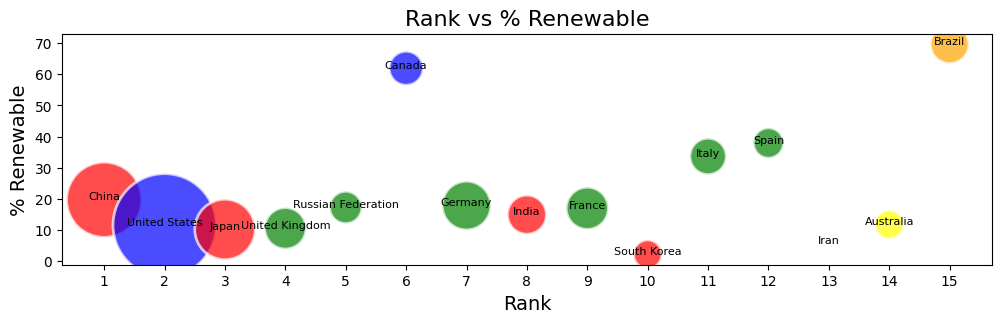

In [16]:
import matplotlib.pyplot as plt

def bubble_chart(df):
    x = df['Rank']
    y = df['% Renewable']
    size = df['2015'] / 3e9

    # Словник для відображення кольорів континентів
    continent_colors = {
        'Asia': 'red',
        'North America': 'blue',
        'Europe': 'green',
        'Australia': 'yellow',
        'South America': 'orange'
    }

    # Отримуємо кольори для кожного континенту
    colors = df['Continent'].map(continent_colors)

    # Створюємо бульбашкову діаграму
    plt.figure(figsize=(12, 3))
    scatter = plt.scatter(x, y, s=size, c=colors, alpha=0.7, edgecolors='w', linewidth=2)

    plt.title('Rank vs % Renewable', fontsize=16)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel('% Renewable', fontsize=14)

    # Налаштування міток осі X з кроком 1
    plt.xticks(np.arange(min(x), max(x)+1, 1))

    # Додаємо назви країн на бульбашках
    for i in range(len(df)):
        plt.annotate(df.index[i], (x.iloc[i], y.iloc[i]), fontsize=8, ha='center')

    plt.show()

# Виклик функції
bubble_chart(final_df)